In [1]:
%autosave 0

Autosave disabled


# suneku.classifier

In [2]:
from suneku import hello
from suneku.classifier import LogisticClassifier, traintest
hello(LogisticClassifier)

type

    Classify rows of a matrix into one of several categories.
    Return a DataFrame with category and probability for each row.

    Initialize using training data with known categories.
    Call with new data to classify each row.

    Input
        data    any valid DataFrame input: Training data.
        target  string or int: Name of column with known classes.
        **kwargs are passed to scikit-learn model.
    


## demo

In [3]:
demo = LogisticClassifier.demo()
print(demo)

LogisticClassifier
target  : species
samples : 150
model   : LogisticRegressionCV
features:
  sepal length (cm)
  sepal width (cm)
  petal length (cm)
  petal width (cm)
classes :
  setosa
  versicolor
  virginica


In [4]:
demo.data.head()

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


## partition rows into training and testing

In [5]:
traindata,testdata = traintest(demo.data,0.33)
traindata.sample(5)

Train with 49 of 150 rows


,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
80,versicolor,5.5,2.4,3.8,1.1
50,versicolor,7.0,3.2,4.7,1.4
95,versicolor,5.7,3.0,4.2,1.2
114,virginica,5.8,2.8,5.1,2.4
81,versicolor,5.5,2.4,3.7,1.0


## build a LogisticClassifier
Pre-processing and learning are automatic.

In [6]:
params = {'penalty':'l1','solver':'liblinear'}
classifier = LogisticClassifier(traindata,'species',**params)
print(classifier)

LogisticClassifier
target  : species
samples : 49
model   : LogisticRegressionCV
features:
  sepal length (cm)
  sepal width (cm)
  petal length (cm)
  petal width (cm)
classes :
  setosa
  versicolor
  virginica


## inspect data

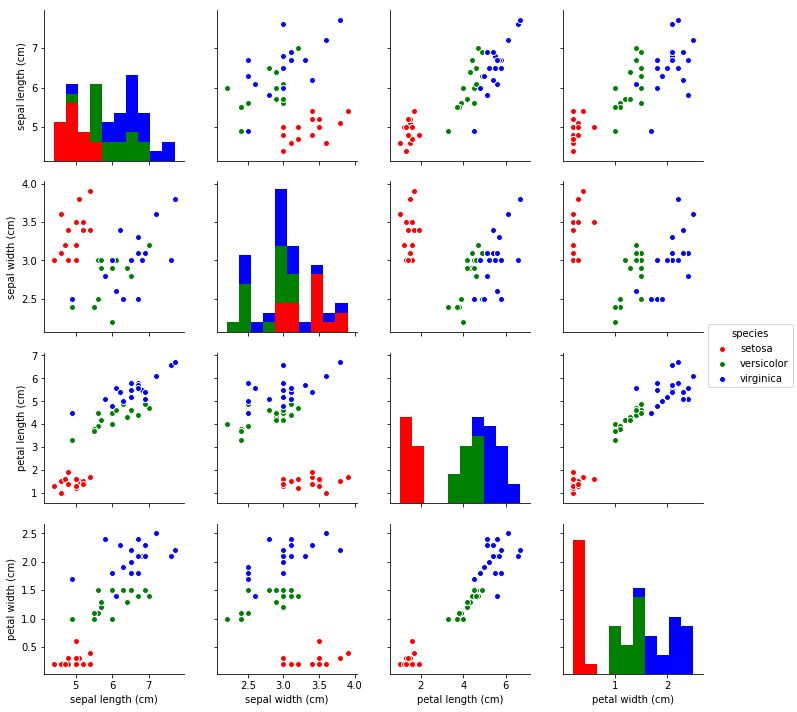

In [7]:
pairgrid = classifier.show(palette=list('rgb'))

## inspect model

In [8]:
print(classifier.model)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)


In [9]:
classifier.coefs()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.000000,0.433493,-2.110181,0.000000
versicolor,1.209620,-1.842864,0.000000,-1.452936
virginica,-10.225122,1.321914,46.739045,37.837794


## classify things

In [10]:
classifier(testdata).sample(5)

,class,p_class
51,versicolor,0.508176
47,setosa,0.852205
42,setosa,0.880945
101,virginica,0.705137
145,virginica,0.756979


In [11]:
classifier.probs(testdata).sample(5)

,setosa,versicolor,virginica
44,0.973617,0.026383,2.518699e-45
149,0.085775,0.132294,7.819317e-01
8,0.732103,0.267897,1.651063e-51
89,0.233305,0.766695,3.377614e-12
82,0.293780,0.706220,3.385790e-16


## test with known classes

In [12]:
print('Top 5 worst predictions:')
classifier.test(testdata).nlargest(5,'surprise')

Top 5 worst predictions:
89.1% correct

class       setosa  versicolor  virginica
species                                  
setosa          34           1          0
versicolor       5          26          3
virginica        0           2         30



,class,correct,p_class,reality,surprise
119,versicolor,False,0.839290,virginica,2.637469
85,setosa,False,0.799135,versicolor,2.315703
70,virginica,False,0.797825,versicolor,2.306324
133,versicolor,False,0.671909,virginica,1.607831
83,virginica,False,0.626219,versicolor,1.419734


## try again with new parameters

In [13]:
params = dict()
params['multi_class'] = 'multinomial'
params['penalty'] = 'l2'
params['solver'] = 'lbfgs'

classifier.learn(**params)
classifier.coefs()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-2.335692,3.216301,-5.930037,-5.156432
versicolor,2.990490,-1.512983,-3.871019,-3.392405
virginica,-0.654797,-1.703318,9.801057,8.548838


In [14]:
print('Top 5 worst predictions:')
classifier.test(testdata).nlargest(5,'surprise')

Top 5 worst predictions:
97.0% correct

class       setosa  versicolor  virginica
species                                  
setosa          35           0          0
versicolor       0          32          2
virginica        0           1         31



,class,correct,p_class,reality,surprise
70,virginica,False,0.918401,versicolor,3.615300
83,virginica,False,0.850194,versicolor,2.738833
133,versicolor,False,0.690307,virginica,1.691091
119,virginica,True,0.501302,virginica,0.996248
41,setosa,True,0.528061,setosa,0.921225
